# Лабораторна робота № 1.

Тема:

„Вибір та реалізація базових фреймворків та бібліотек”.

Мета роботи:

 «Вибір базових бібліотек/сервісів для подальшої реалізації
криптосистеми».

Для першого типу лабораторних робіт - дослідження алгоритмів реалізації
арифметичних операцій над великими (багато розрядними) числами над
скінченими полями та групами з точки зору їх ефективності за часом та пам’яттю
для різних програмно-апаратних середовищ.

Варіанти завдань першого типу. Дослідити бібліотеки багатослівної
арифметики.

Підгрупа 1А. Бібліотеки багаторозрядної арифметики, вбудовані в програмні
платформи С++/С# (BigInteger), Java (BigInt), Python або Crypto++ (обрати одну з
них) для процесорів із 32-розрядною архітектурою та обсягом оперативної пам’яті
до 16 ГБ (user Endpoints terminal).

Підгрупа 1B. Бібліотека багаторозрядної арифметики Pari/GP для процесорів
із 64-розрядною архітектурою та обсягом оперативної пам’яті до 64 ГБ (сервери).

Підгрупа 1С. Бібліотека багаторозрядної арифметики GNU GMP для
паралельної моделі обчислень – декілька процесорів (можливо багатоядерних) із
64-розрядною архітектурою та обсягом оперативної пам’яті до 128 ГБ. Приклад –
сервер обробки транзакцій/обладнання провайдера хмарних послуг.

Оформлення результатів роботи. Опис функції багато розрядної
арифметики обраної бібліотеки з описом алгоритму та оцінками їх складності,
вхідних та вихідних даних, кодів повернення. Контрольний приклад роботи з
функціями.

In [1]:
!pip install gmpy2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 12.8 MB/s eta 0:00:00


In [2]:
import time
import gmpy2
from gmpy2 import mpz

def benchmark_operation(func, *args, iterations=10):
    """
    Вимірює середній час виконання операції.
    :param func: функція, яку потрібно протестувати.
    :param args: аргументи для функції.
    :param iterations: кількість повторень для усереднення часу.
    :return: середній час виконання операції.
    """
    start = time.time()
    for _ in range(iterations):
        func(*args)
    end = time.time()
    return (end - start) / iterations

# Операції для тестування
def test_addition(a, b):
    return a + b

def test_multiplication(a, b):
    return a * b

def test_modular_exponentiation(a, b, mod):
    return pow(a, b, mod)

# Генерація великих чисел
def generate_large_numbers(bit_size):
    """
    Генерує два великих числа заданого розміру в бітах.
    """
    max_value = 2 ** bit_size - 1
    return mpz(gmpy2.mpz(max_value // 3)), mpz(gmpy2.mpz(max_value // 5))

# Основна програма
if __name__ == "__main__":
    bit_sizes = [128, 256, 512, 1024]  # Розміри чисел у бітах
    iterations = 10  # Кількість повторень

    print("Тестування операцій із великими числами:")
    print("Бітовий розмір | Операція          | Середній час (с)")

    for bit_size in bit_sizes:
        # Генерація великих чисел
        a, b = generate_large_numbers(bit_size)
        mod = mpz(2 ** (bit_size - 1))

        # Тестування додавання
        avg_time = benchmark_operation(test_addition, a, b, iterations=iterations)
        print(f"{bit_size:14} | Додавання        | {avg_time:.6f}")

        # Тестування множення
        avg_time = benchmark_operation(test_multiplication, a, b, iterations=iterations)
        print(f"{bit_size:14} | Множення         | {avg_time:.6f}")

        # Тестування модульного піднесення до степеня
        avg_time = benchmark_operation(test_modular_exponentiation, a, b, mod, iterations=iterations)
        print(f"{bit_size:14} | Піднесення до модуля | {avg_time:.6f}")

Тестування операцій із великими числами:
Бітовий розмір | Операція          | Середній час (с)
           128 | Додавання        | 0.000005
           128 | Множення         | 0.000002
           128 | Піднесення до модуля | 0.000009
           256 | Додавання        | 0.000001
           256 | Множення         | 0.000001
           256 | Піднесення до модуля | 0.000019
           512 | Додавання        | 0.000001
           512 | Множення         | 0.000001
           512 | Піднесення до модуля | 0.000049
          1024 | Додавання        | 0.000001
          1024 | Множення         | 0.000001
          1024 | Піднесення до модуля | 0.000316


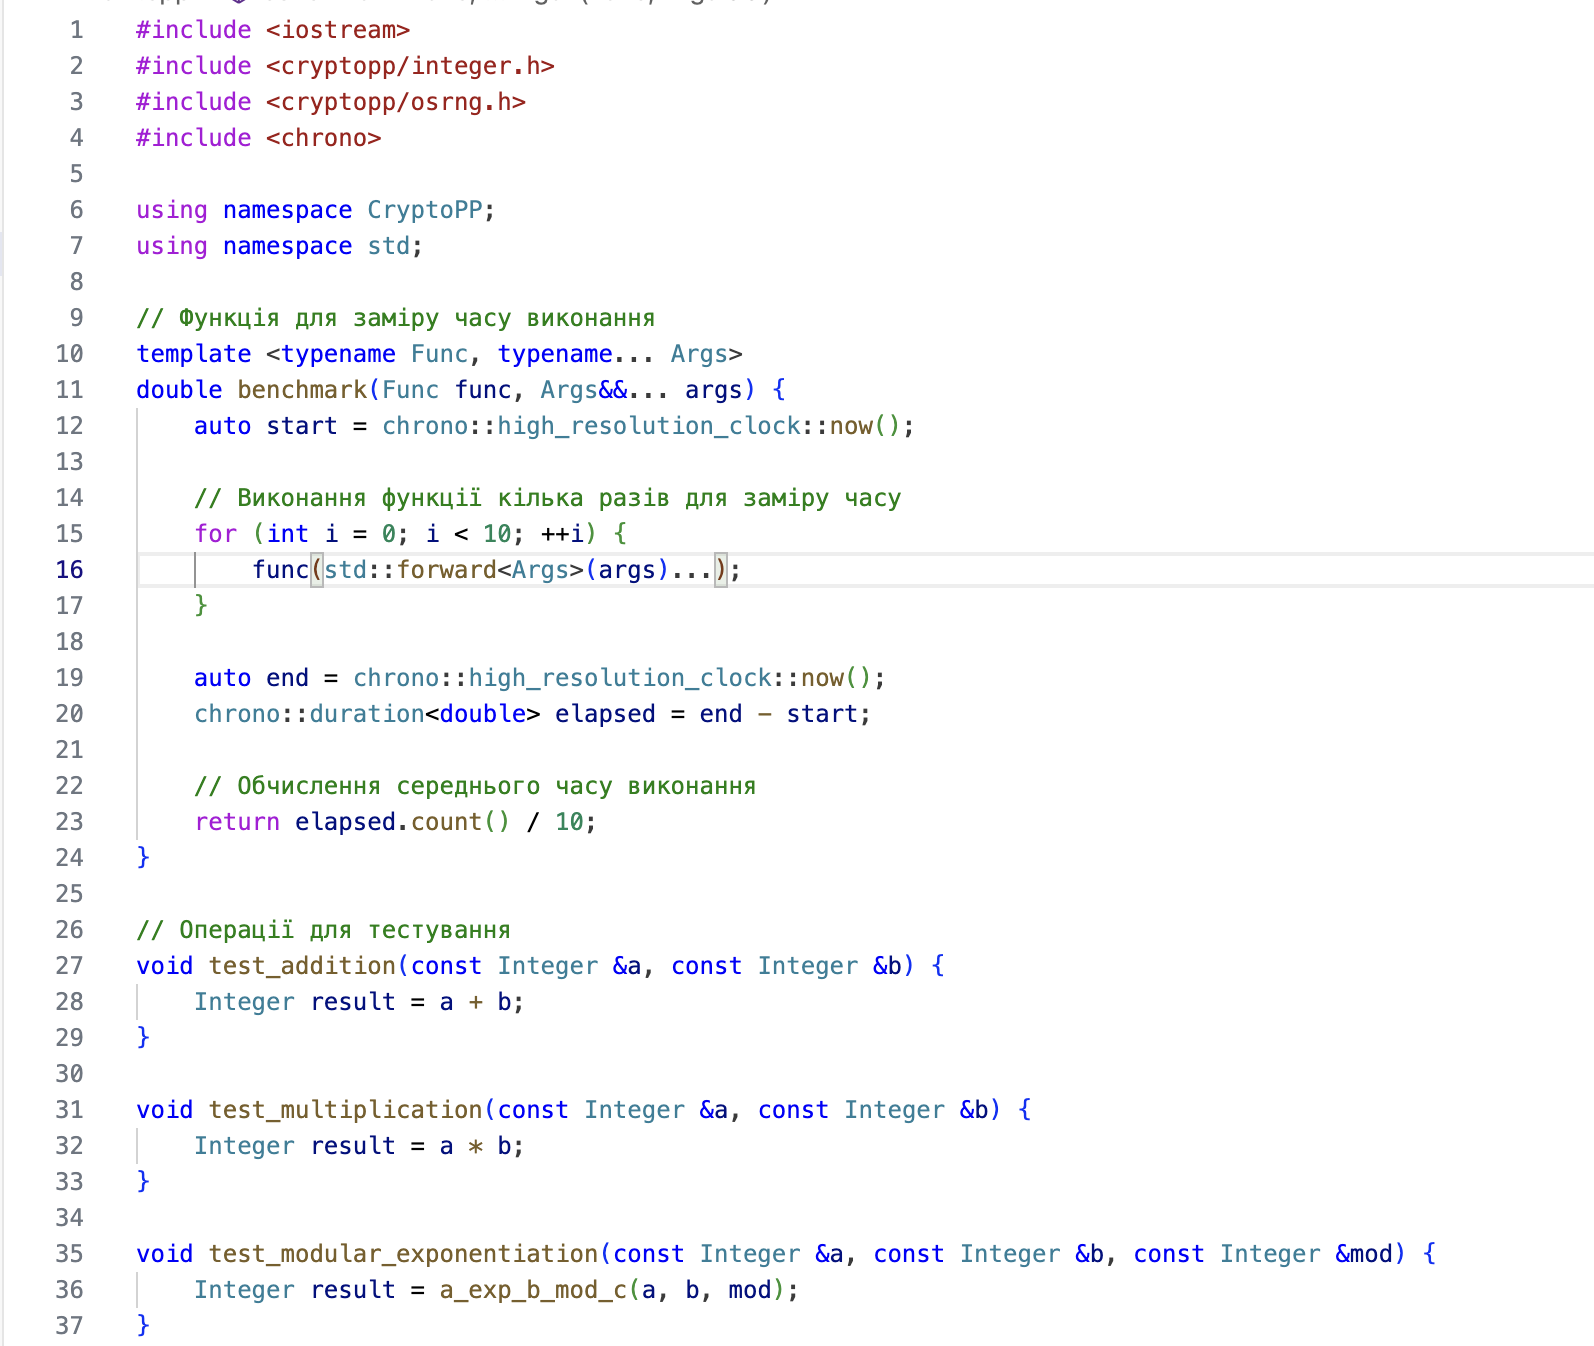

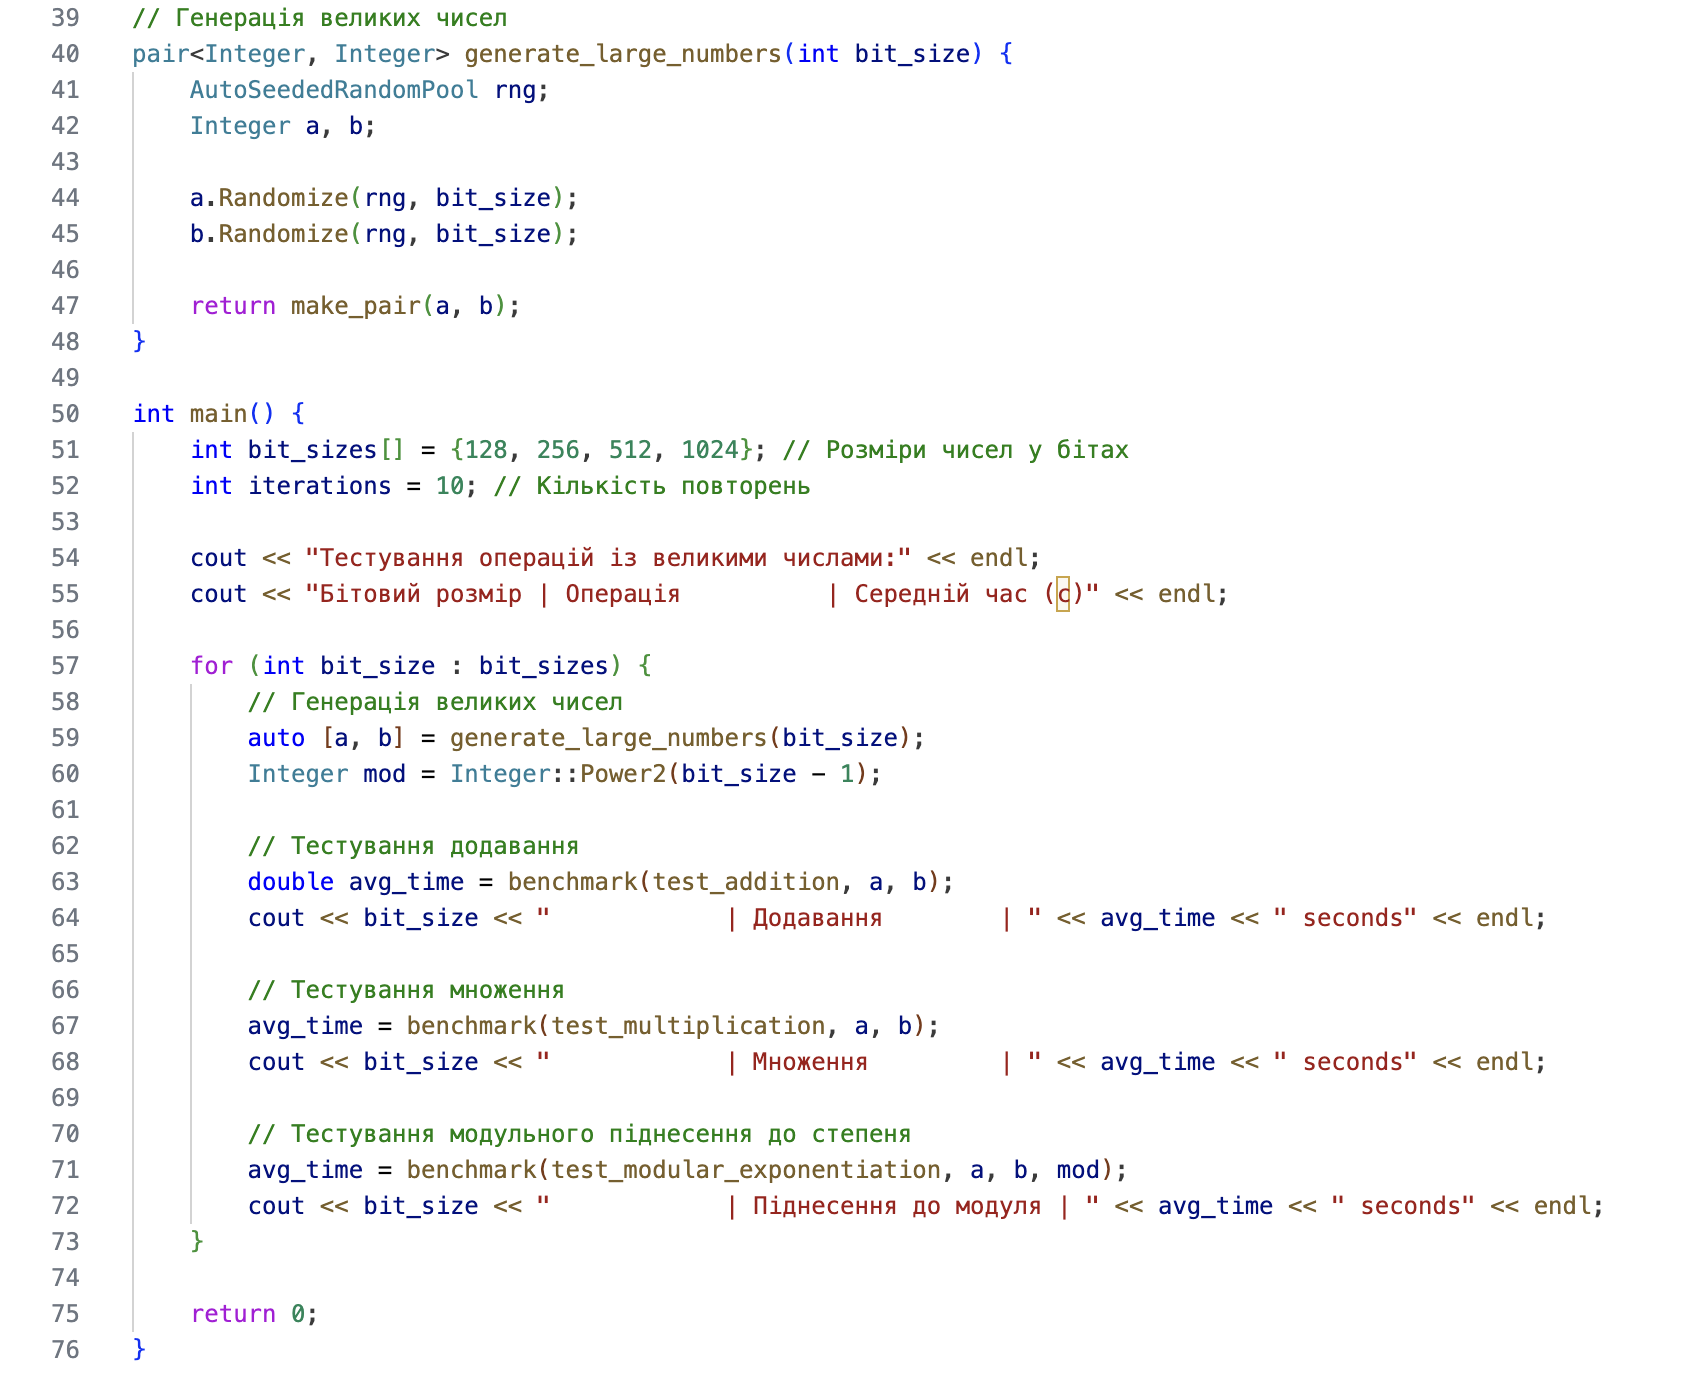

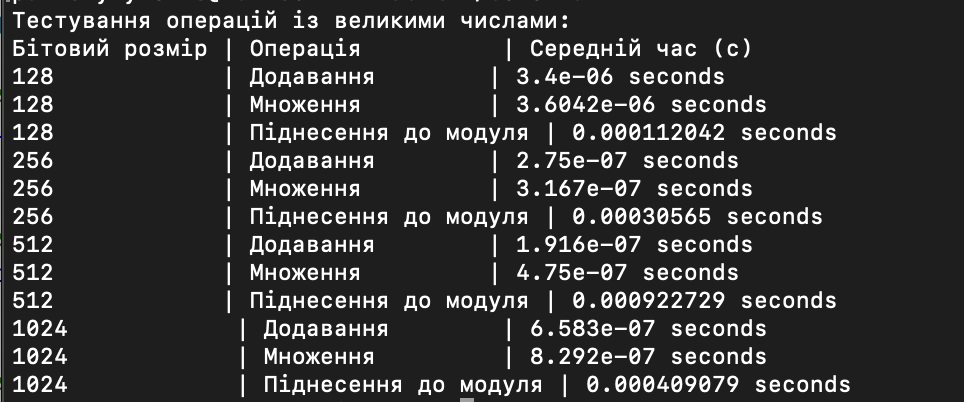

**Порівняння Python (gmpy2) та C++ (Crypto++)**
----
Загальна продуктивність:

* C++ з Crypto++ є значно швидшим, ніж Python з gmpy2, для операцій додавання та множення на всіх бітових розмірах.
* Python (gmpy2) демонструє кращий результат для операції піднесення до модуля лише на найбільшому розмірі (1024 біти).

Операції:

* Для додавання та множення C++ (Crypto++) залишається на порядок швидшим.
* Піднесення до модуля є найповільнішою операцією в обох бібліотеках:
* На менших розмірах (128-512 біт) C++ працює швидше.
* На найбільшому розмірі (1024 біти) Python (gmpy2) показує кращий результат (0.000316 секунд проти 0.000409079 секунд у C++).

C++ (Crypto++) підходить для більшості операцій із великими числами, особливо для задач, що вимагають високої продуктивності.
Python (gmpy2) можна розглядати як альтернативу для операцій піднесення до модуля на великих числах, але він поступається в інших випадках.

Висновок для 1024-бітових чисел

Для задач, де важлива операція піднесення до модуля, на розмірі 1024 біти Python (gmpy2) ефективніший.
В інших випадках продуктивність C++ (Crypto++) залишається кращою.